# Flights
## by Justus Ilemobayo

## Preliminary Wrangling

> This dataset reports Öights in the United States,
including carriers, arrival and departure delays, and
reasons for delays, for 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [76]:
flight = pd.read_csv("airline_delay_causes_final.csv")

In [77]:
print(flight.shape)
print(flight.dtypes)
#print(flight.head(5))

(20946, 22)
year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object


In [78]:
flight.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,NaN
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0,NaN
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0,NaN


In [79]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946 entries, 0 to 20945
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20946 non-null  int64  
 1    month               20946 non-null  int64  
 2   carrier              20946 non-null  object 
 3   carrier_name         20946 non-null  object 
 4   airport              20946 non-null  object 
 5   airport_name         20946 non-null  object 
 6   arr_flights          20932 non-null  float64
 7   arr_del15            20927 non-null  float64
 8   carrier_ct           20932 non-null  float64
 9    weather_ct          20932 non-null  float64
 10  nas_ct               20932 non-null  float64
 11  security_ct          20932 non-null  float64
 12  late_aircraft_ct     20932 non-null  float64
 13  arr_cancelled        20932 non-null  float64
 14  arr_diverted         20932 non-null  float64
 15   arr_delay           20932 non-null 

In [80]:
flight.drop(columns =['Unnamed: 21'], axis=1, inplace =True)

In [81]:
new_cols = []
for i in flight.keys():
    #strip()
    i.strip()
    new_cols.append(i.strip())
print (new_cols)
    

['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']


In [82]:
flight.columns =new_cols

In [83]:
flight.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,0.0,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,0.0,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,0.0,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,0.0,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,0.0,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0


In [84]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946 entries, 0 to 20945
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20946 non-null  int64  
 1   month                20946 non-null  int64  
 2   carrier              20946 non-null  object 
 3   carrier_name         20946 non-null  object 
 4   airport              20946 non-null  object 
 5   airport_name         20946 non-null  object 
 6   arr_flights          20932 non-null  float64
 7   arr_del15            20927 non-null  float64
 8   carrier_ct           20932 non-null  float64
 9   weather_ct           20932 non-null  float64
 10  nas_ct               20932 non-null  float64
 11  security_ct          20932 non-null  float64
 12  late_aircraft_ct     20932 non-null  float64
 13  arr_cancelled        20932 non-null  float64
 14  arr_diverted         20932 non-null  float64
 15  arr_delay            20932 non-null 

In [85]:
flight.arr_cancelled.value_counts()

0.0      9014
1.0      3211
2.0      1944
3.0      1233
4.0       889
         ... 
160.0       1
320.0       1
298.0       1
314.0       1
526.0       1
Name: arr_cancelled, Length: 251, dtype: int64

In [86]:
#flights

In [87]:
flight.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,20946.0,20946.000000,20932.000000,20927.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000
mean,2019.0,6.548124,354.578492,66.385674,18.529209,2.212045,20.996112,0.126231,24.506268,6.445872,0.901968,4581.010940,1402.300783,252.364848,1100.938945,6.377030,1819.029333
std,0.0,3.454813,994.222826,177.396659,44.285872,6.821045,67.444734,0.545841,68.196091,26.798972,3.937406,13349.726176,3859.290938,903.289207,4239.372921,40.753285,5278.977954
min,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,4.000000,48.000000,7.000000,2.130000,0.000000,1.320000,0.000000,2.000000,0.000000,0.000000,402.750000,115.000000,0.000000,48.000000,0.000000,114.000000
50%,2019.0,7.000000,93.000000,18.000000,5.990000,0.530000,4.260000,0.000000,6.180000,1.000000,0.000000,1154.000000,380.000000,24.000000,166.000000,0.000000,422.000000
75%,2019.0,10.000000,237.000000,46.000000,15.062500,1.930000,11.990000,0.000000,16.740000,4.000000,1.000000,3100.250000,1085.000000,169.000000,513.000000,0.000000,1257.000000
max,2019.0,12.000000,21873.000000,3714.000000,966.330000,175.560000,1485.820000,12.510000,1429.550000,933.000000,115.000000,329847.000000,97970.000000,23749.000000,97283.000000,3194.000000,125086.000000


In [88]:
flight.carrier_delay.value_counts().iloc[:20]

0.0     1337
18.0      61
15.0      56
17.0      52
8.0       51
19.0      50
53.0      50
21.0      49
16.0      49
31.0      47
40.0      46
26.0      45
91.0      44
20.0      44
27.0      43
34.0      42
29.0      42
70.0      42
12.0      42
6.0       41
Name: carrier_delay, dtype: int64

### What is the structure of your dataset?

> There are about 20946 entries in the dataset with 21 features. Most of the variables are numeric in nature but there are a few categorical variable like carrier, carrier_name, airport and airport name. 


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in the factors that contribute most to the cancellation of a flight. These factors are arrival delay, arrival cancelled and arrival di verted

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that NAS delay, carrier delay, weather delay, security delay would be contributing factors to cancellation

In [89]:
flight['carrier_name'].value_counts()

SkyWest Airlines Inc.       2960
Delta Air Lines Inc.        1732
Envoy Air                   1707
Allegiant Air               1431
Mesa Airlines Inc.          1332
United Air Lines Inc.       1264
American Airlines Inc.      1256
Endeavor Air Inc.           1207
Frontier Airlines Inc.      1180
Republic Airline            1111
PSA Airlines Inc.           1106
Southwest Airlines Co.      1048
Alaska Airlines Inc.         865
ExpressJet Airlines LLC      850
JetBlue Airways              784
Spirit Air Lines             577
ExpressJet Airlines Inc.     311
Hawaiian Airlines Inc.       225
Name: carrier_name, dtype: int64

In [90]:
flight.airport_name.value_counts()

Pittsburgh, PA: Pittsburgh International            190
Raleigh/Durham, NC: Raleigh-Durham International    184
Nashville, TN: Nashville International              183
Cleveland, OH: Cleveland-Hopkins International      180
Jacksonville, FL: Jacksonville International        179
                                                   ... 
Greenville, NC: Pitt Greenville                       4
Dillingham, AK: Dillingham Airport                    3
King Salmon, AK: King Salmon Airport                  3
Williston, ND: Williston Basin International          3
Gustavus, AK: Gustavus Airport                        3
Name: airport_name, Length: 360, dtype: int64

In [91]:
flight.carrier.value_counts()

OO    2960
DL    1732
MQ    1707
G4    1431
YV    1332
UA    1264
AA    1256
9E    1207
F9    1180
EV    1161
YX    1111
OH    1106
WN    1048
AS     865
B6     784
NK     577
HA     225
Name: carrier, dtype: int64

In [92]:
flight.airport_name.value_counts().iloc[:20]

Pittsburgh, PA: Pittsburgh International                      190
Raleigh/Durham, NC: Raleigh-Durham International              184
Nashville, TN: Nashville International                        183
Cleveland, OH: Cleveland-Hopkins International                180
Jacksonville, FL: Jacksonville International                  179
Indianapolis, IN: Indianapolis International                  178
Detroit, MI: Detroit Metro Wayne County                       178
Atlanta, GA: Hartsfield-Jackson Atlanta International         177
Kansas City, MO: Kansas City International                    176
New Orleans, LA: Louis Armstrong New Orleans International    176
Charleston, SC: Charleston AFB/International                  175
Richmond, VA: Richmond International                          168
Washington, DC: Ronald Reagan Washington National             168
New York, NY: LaGuardia                                       168
Columbus, OH: John Glenn Columbus International               166
Minneapoli

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [93]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946 entries, 0 to 20945
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20946 non-null  int64  
 1   month                20946 non-null  int64  
 2   carrier              20946 non-null  object 
 3   carrier_name         20946 non-null  object 
 4   airport              20946 non-null  object 
 5   airport_name         20946 non-null  object 
 6   arr_flights          20932 non-null  float64
 7   arr_del15            20927 non-null  float64
 8   carrier_ct           20932 non-null  float64
 9   weather_ct           20932 non-null  float64
 10  nas_ct               20932 non-null  float64
 11  security_ct          20932 non-null  float64
 12  late_aircraft_ct     20932 non-null  float64
 13  arr_cancelled        20932 non-null  float64
 14  arr_diverted         20932 non-null  float64
 15  arr_delay            20932 non-null 

C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


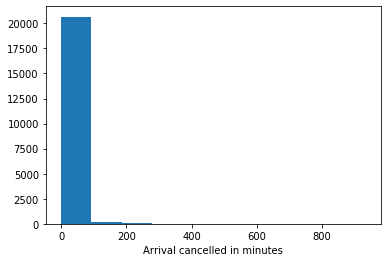

In [94]:
plt.hist(data = flight, x = 'arr_cancelled');
plt.xlabel('Arrival cancelled in minutes');

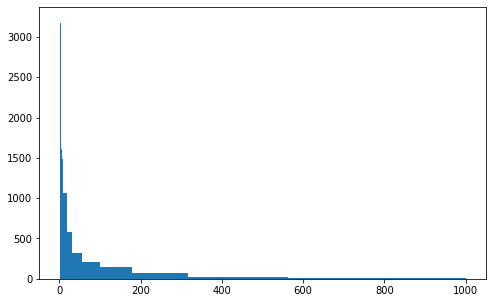

In [95]:

log_binsize =0.25
bins =10 ** np.arange(0, np.log10(flight['arr_cancelled'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = flight, x = 'arr_cancelled' , bins=bins);


In [96]:
flight.arr_cancelled.mean()

6.445872348557233

From the plots above we that the arr_cancelled plots are right-skewed. Most of them have a low arrival cancellation time with a mean time of 6 minutes. Most values lie between 0-100mins

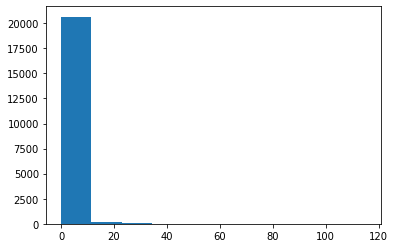

In [97]:
plt.hist(data = flight, x = 'arr_diverted');

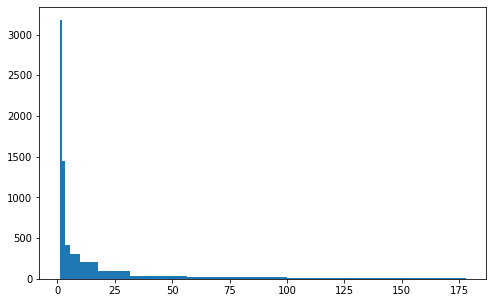

In [98]:
log_binsize =0.25
bins =10 ** np.arange(0, np.log10(flight['arr_diverted'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = flight, x = 'arr_diverted' , bins=bins);


In [99]:
flight.arr_diverted.mean()

0.9019682782342824

From the plots above we that the arr_diverted  plots are right-skewed. Most of them have a low arrival diverted  time with a mean time of about 1 minute. Most values lie between 0-10mins

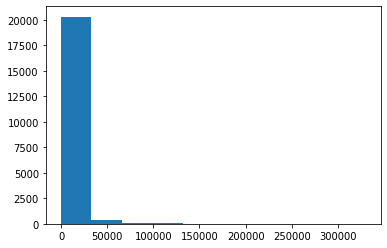

In [100]:
plt.hist(data = flight, x = 'arr_delay');

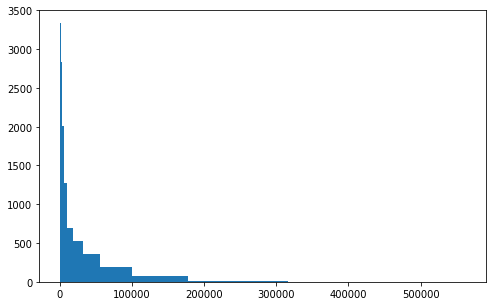

In [101]:
log_binsize =0.25
bins =10 ** np.arange(0, np.log10(flight['arr_delay'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = flight, x = 'arr_delay' , bins=bins);


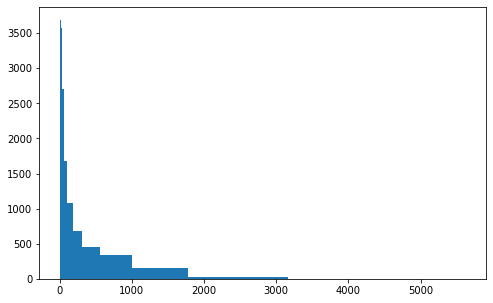

In [102]:
log_binsize =0.25
bins =10 ** np.arange(0, np.log10(flight['arr_del15'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = flight, x = 'arr_del15' , bins=bins);


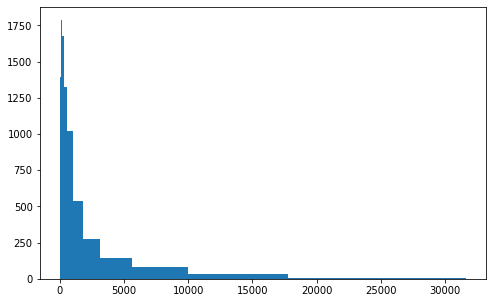

In [103]:
log_binsize =0.25
bins =10 ** np.arange(0, np.log10(flight['weather_delay'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = flight, x = 'weather_delay' , bins=bins);


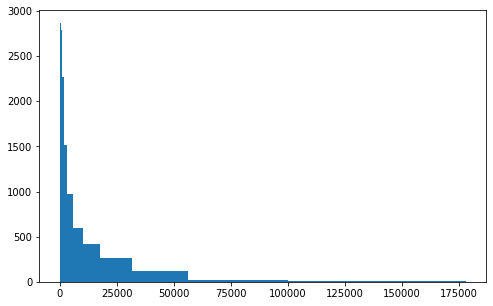

In [104]:
log_binsize =0.25
bins =10 ** np.arange(0, np.log10(flight['late_aircraft_delay'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = flight, x = 'late_aircraft_delay', bins=bins);


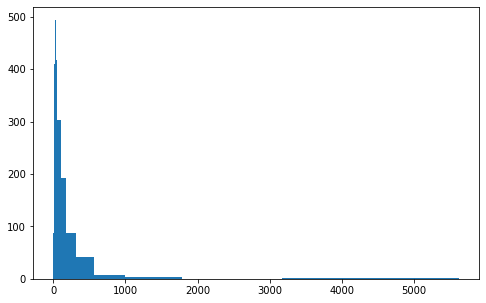

In [105]:
log_binsize =0.25
bins =10 ** np.arange(0, np.log10(flight['security_delay'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = flight, x = 'security_delay', bins=bins);


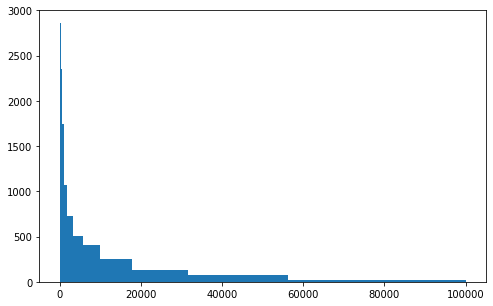

In [106]:
log_binsize =0.25
bins =10 ** np.arange(0, np.log10(flight['nas_delay'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = flight, x = 'nas_delay', bins=bins);



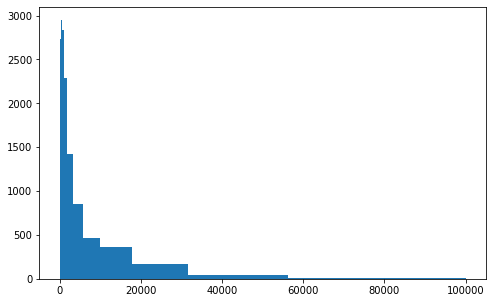

In [107]:

log_binsize =0.25
bins =10 ** np.arange(0, np.log10(flight['carrier_delay'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = flight, x = 'carrier_delay', bins=bins);



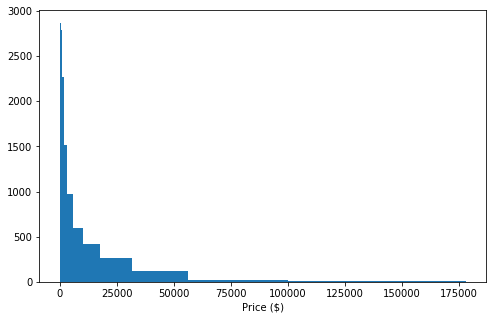

In [108]:
# start with a standard-scaled plot
#binsize = 2000
log_binsize =0.25
bins =10 ** np.arange(0, np.log10(flight['late_aircraft_delay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = flight, x = 'late_aircraft_delay' , bins=bins)
plt.xlabel('Price ($)')
plt.show()

**The above plots show the distribution of arr_delay, arr_diverted, late_aircraft_delay,carrier_delay, nas_delay, security_delay and weather delay. All these plots show that these features are right skewed. When plotted on a log scale they still show this skewness.** 

Text(0.5, 1.0, 'Count of Carrier Name')

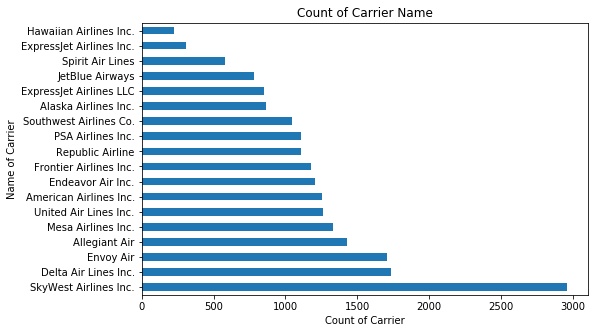

In [180]:
plt.figure(figsize=[8, 5])

flight.carrier_name.value_counts().plot(kind='barh')
plt.ylabel('Name of Carrier')
plt.xlabel("Count of Carrier")
plt.title("Count of Carrier Name")

**The above plot shows the number of flight of each carrier in 2019**

Text(0.5, 1.0, 'Top ten airport based on number of flights')

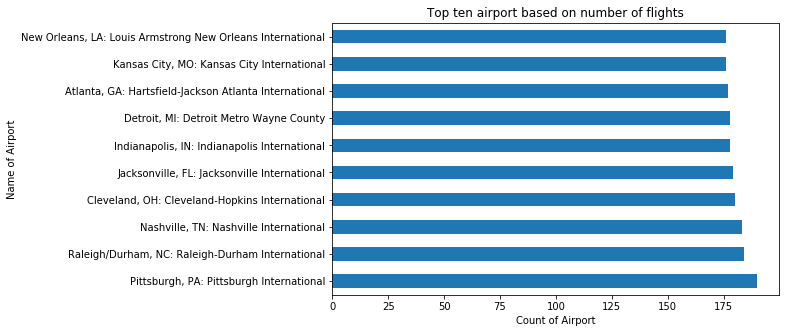

In [181]:


plt.figure(figsize=[8, 5])

flight.airport_name.value_counts().iloc[:10].plot(kind='barh')

plt.ylabel('Name of Airport')
plt.xlabel("Count of Airport")
plt.title("Top ten airport based on number of flights")

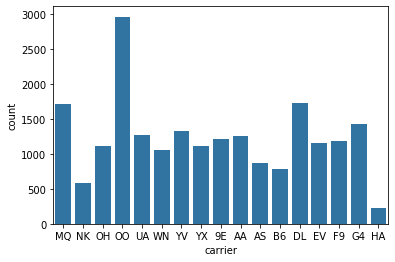

In [111]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

#ig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
#sb.countplot(data = flight, x = 'airport', color = default_color, ax = ax[0])
sb.countplot(data = flight, x = 'carrier', color = default_color)#, ax = ax[0])
#sb.countplot(data = flight, x = 'carrier_name', color = default_color, ax = ax[1])

#sb.countplot(data = flight, x = 'carrier_name', color = default_color, ax = ax[1])
#plt.plot(flight['carrier_name'], kind = 'barh')#, color = default_color, ax = ax[1])

plt.show()

In [127]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946 entries, 0 to 20945
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20946 non-null  int64  
 1   month                20946 non-null  int64  
 2   carrier              20946 non-null  object 
 3   carrier_name         20946 non-null  object 
 4   airport              20946 non-null  object 
 5   airport_name         20946 non-null  object 
 6   arr_flights          20932 non-null  float64
 7   arr_del15            20927 non-null  float64
 8   carrier_ct           20932 non-null  float64
 9   weather_ct           20932 non-null  float64
 10  nas_ct               20932 non-null  float64
 11  security_ct          20932 non-null  float64
 12  late_aircraft_ct     20932 non-null  float64
 13  arr_cancelled        20932 non-null  float64
 14  arr_diverted         20932 non-null  float64
 15  arr_delay            20932 non-null 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From arr_delay, arr_diverted, arr_cancelled plots, i found out that they were all right skewed with values with many values around 0 and 1. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Other features like carrier delay, weather delay, nas delay, security delay and late aircraft delay where also right skewed.

In [112]:
flight.arr_cancelled.value_counts().sort_values(ascending=False)

0.0      9014
1.0      3211
2.0      1944
3.0      1233
4.0       889
         ... 
108.0       1
184.0       1
144.0       1
120.0       1
526.0       1
Name: arr_cancelled, Length: 251, dtype: int64

In [113]:
arrival_cancelled = []
for i in flight.arr_cancelled:
    if i==1:
        arrival_cancelled.append("Yes")
    elif i==0:
        arrival_cancelled.append("No")
    else:
        arrival_cancelled.append("None")


        

In [114]:
ar_cancelled = pd.DataFrame(arrival_cancelled)

In [115]:
ar_cancelled[0].value_counts()

No      9014
None    8721
Yes     3211
Name: 0, dtype: int64

In [117]:
arrival_delayed = []
for i in flight.arr_delay:
    if i==1:
        arrival_delayed.append("Yes")
    elif i==0:
        arrival_delayed.append("No")
    else:
        arrival_delayed.append("None")


        

In [118]:
ar_delayed = pd.DataFrame(arrival_delayed)
ar_delayed[0].value_counts()

None    20282
No        664
Name: 0, dtype: int64

In [121]:
arrival_diverted = []
for i in flight.arr_delay:
    if i==1:
        arrival_diverted.append("Yes")
    elif i==0:
        arrival_diverted.append("No")
    else:
        arrival_diverted.append("None")


        

In [122]:
ar_diverted = pd.DataFrame(arrival_diverted)
ar_diverted[0].value_counts()

None    20282
No        664
Name: 0, dtype: int64

In [150]:
arrival_del15 = []
for i in flight.arr_del15:
    if i==1:
        arrival_del15.append("Yes")
    elif i==0:
        arrival_del15.append("No")
    else:
        arrival_del15.append("None")


        

In [151]:
ar_del15 = pd.DataFrame(arrival_del15)
ar_del15[0].value_counts()

None    19566
Yes       721
No        659
Name: 0, dtype: int64

In [120]:
#flight.arr_delay.value_counts()

In [116]:
#flight.drop(columns=['arrival_cancelled'], inplace=True, axis=1)

In [70]:
ar_cancelled.shape[0], flight.shape[0]

(20946, 20946)

In [123]:
#flight = flight+ar_cancelled

In [125]:
#flight

In [126]:
#flight = pd.merge(flight, ar_cancelled, how='right', right_index=False)

In [38]:
"""# re-using code to plot depth and table.
fig, ax = plt.subplots(nrows=2, figsize = [9,8])

variables = ['late_aircraft_delay', 'carrier_delay']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(flight[var]), max(flight[var])+0.2, 0.2)
    ax[i].hist(data = flight, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))

plt.show()"""

"# re-using code to plot depth and table.\nfig, ax = plt.subplots(nrows=2, figsize = [9,8])\n\nvariables = ['late_aircraft_delay', 'carrier_delay']\nfor i in range(len(variables)):\n    var = variables[i]\n    bins = np.arange(min(flight[var]), max(flight[var])+0.2, 0.2)\n    ax[i].hist(data = flight, x = var, bins = bins)\n    ax[i].set_xlabel('{}'.format(var))\n\nplt.show()"

Text(0.5, 1.0, 'Average arrival delay in Minutes based on the carrier')

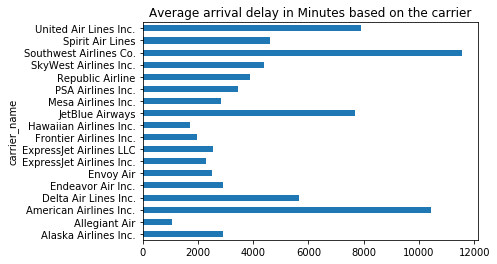

In [182]:
flight.groupby('carrier_name').mean()['arr_delay'].plot(kind='barh')
plt.title("Average arrival delay in Minutes based on the carrier")

Text(0.5, 1.0, 'Average arrival delay in Minutes based on the month')

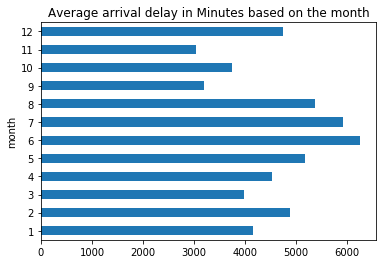

In [183]:
flight.groupby('month').mean()['arr_delay'].plot(kind='barh')
plt.title("Average arrival delay in Minutes based on the month")

Text(0.5, 1.0, 'Average arrival cancelled in Minutes based on the carrier')

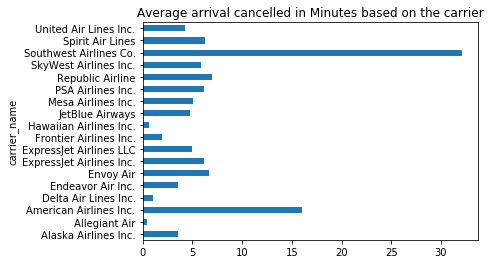

In [184]:
flight.groupby('carrier_name').mean()['arr_cancelled'].plot(kind='barh')
plt.title("Average arrival cancelled in Minutes based on the carrier")

Text(0.5, 1.0, 'Average arrival cancelled in Minutes based on the month')

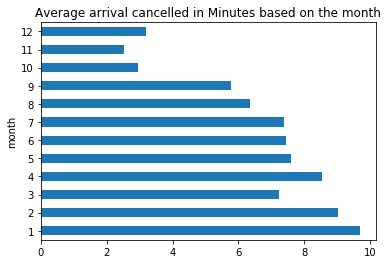

In [185]:
flight.groupby('month').mean()['arr_cancelled'].plot(kind='barh')
plt.title("Average arrival cancelled in Minutes based on the month")

Text(0.5, 1.0, 'Average weather delay in Minutes based on the carrier')

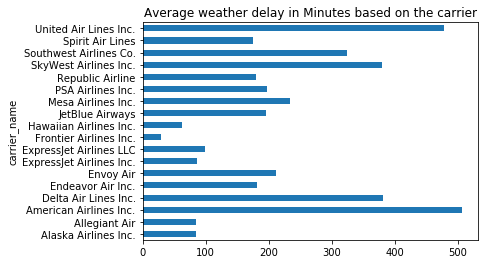

In [186]:
flight.groupby('carrier_name').mean()['weather_delay'].plot(kind='barh')
plt.title("Average weather delay in Minutes based on the carrier")

Text(0.5, 1.0, 'Average weather delay in Minutes based on the month')

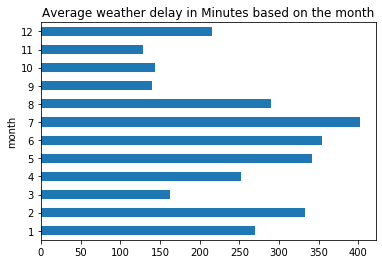

In [187]:
flight.groupby('month').mean()['weather_delay'].plot(kind='barh')
plt.title("Average weather delay in Minutes based on the month")

Text(0.5, 1.0, 'Average nas delay in Minutes based on the carrier')

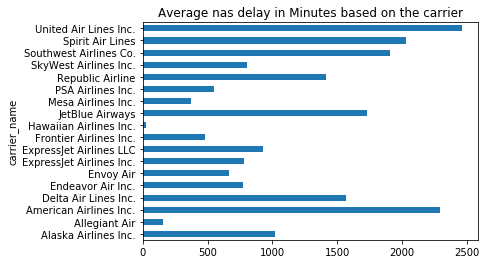

In [188]:
flight.groupby('carrier_name').mean()['nas_delay'].plot(kind='barh')
plt.title("Average nas delay in Minutes based on the carrier")

Text(0.5, 1.0, 'Average nas delay in Minutes based on the month')

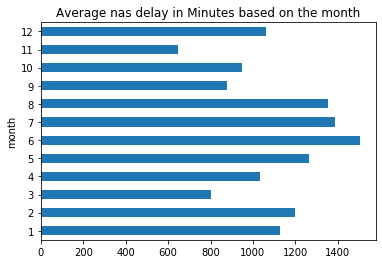

In [189]:
flight.groupby('month').mean()['nas_delay'].plot(kind='barh')
plt.title("Average nas delay in Minutes based on the month")

Text(0.5, 1.0, 'Average security delay in Minutes based on the carrier')

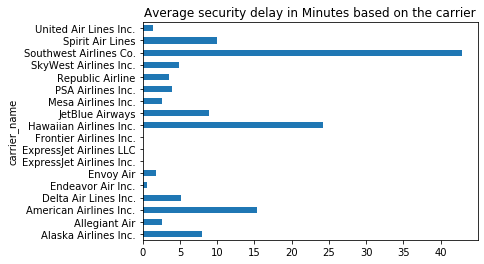

In [190]:
flight.groupby('carrier_name').mean()['security_delay'].plot(kind='barh')
plt.title("Average security delay in Minutes based on the carrier")

Text(0.5, 1.0, 'Average security delay in Minutes based on the month')

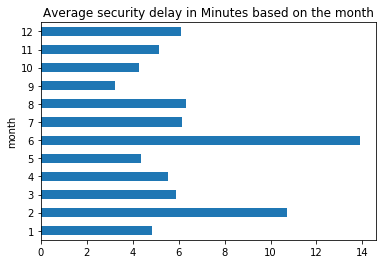

In [191]:
flight.groupby('month').mean()['security_delay'].plot(kind='barh')
plt.title("Average security delay in Minutes based on the month")

Text(0.5, 1.0, 'Average late_aircraft_delay in Minutes based on the carrier')

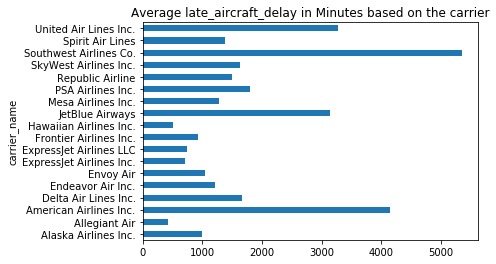

In [192]:
flight.groupby('carrier_name').mean()['late_aircraft_delay'].plot(kind='barh')
plt.title("Average late_aircraft_delay in Minutes based on the carrier")

Text(0.5, 1.0, 'Average carrier delay in Minutes based on the carrier')

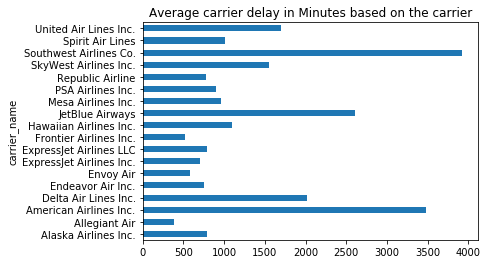

In [193]:
flight.groupby('carrier_name').mean()['carrier_delay'].plot(kind='barh')
plt.title("Average carrier delay in Minutes based on the carrier")

Text(0.5, 1.0, 'Average arrival diverted in Minutes based on the carrier')

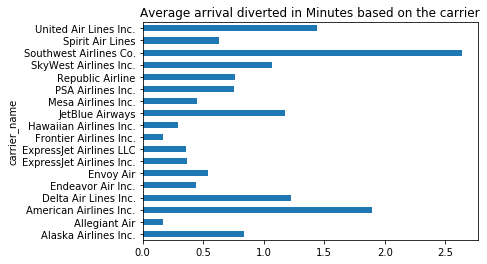

In [194]:
flight.groupby('carrier_name').mean()['arr_diverted'].plot(kind='barh')
plt.title("Average arrival diverted in Minutes based on the carrier")

In [ ]:
#flight.groupby('carrier_name').mean()['weather_delay'].plot(kind='barh')

In [164]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946 entries, 0 to 20945
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20946 non-null  int64  
 1   month                20946 non-null  int64  
 2   carrier              20946 non-null  object 
 3   carrier_name         20946 non-null  object 
 4   airport              20946 non-null  object 
 5   airport_name         20946 non-null  object 
 6   arr_flights          20932 non-null  float64
 7   arr_del15            20927 non-null  float64
 8   carrier_ct           20932 non-null  float64
 9   weather_ct           20932 non-null  float64
 10  nas_ct               20932 non-null  float64
 11  security_ct          20932 non-null  float64
 12  late_aircraft_ct     20932 non-null  float64
 13  arr_cancelled        20932 non-null  float64
 14  arr_diverted         20932 non-null  float64
 15  arr_delay            20932 non-null 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text yticklabel objects>)

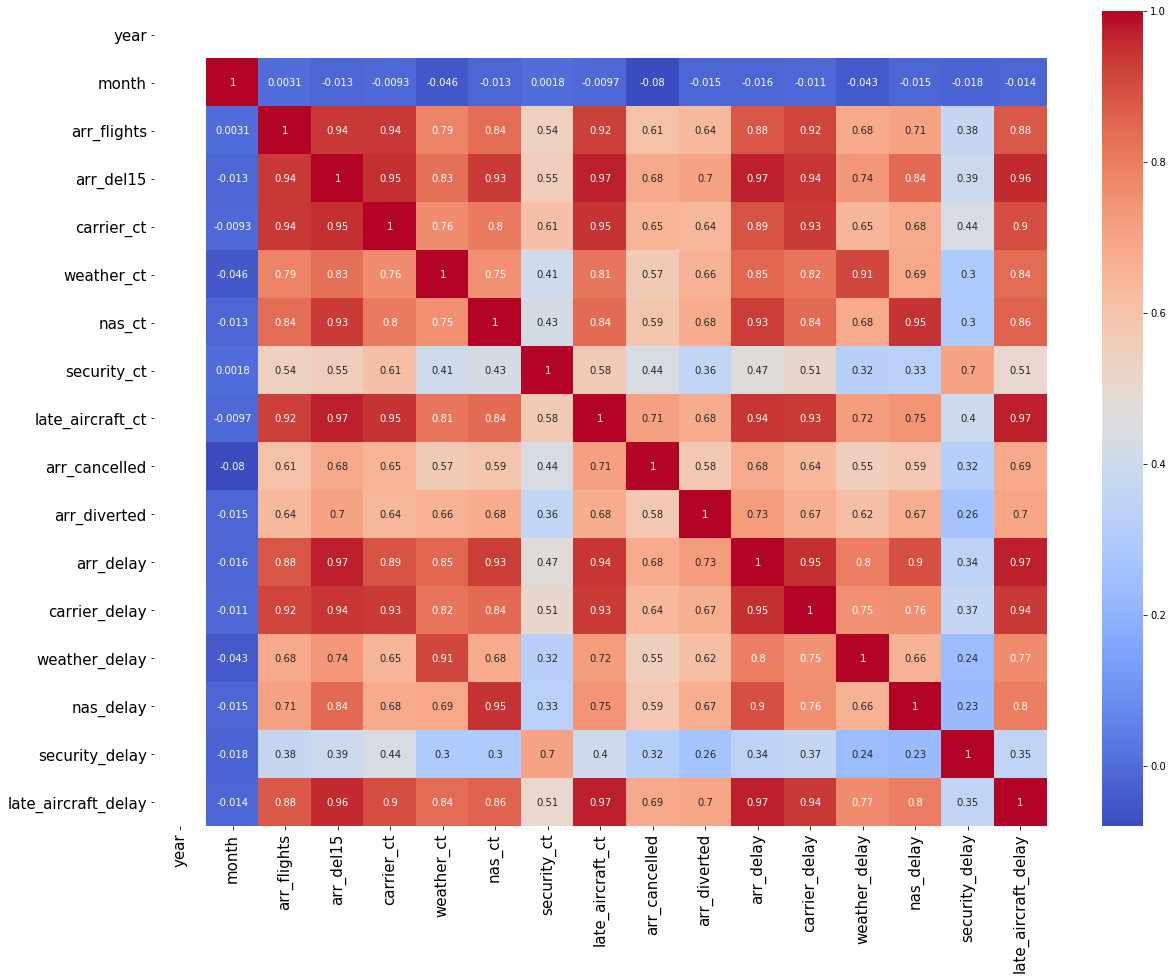

In [129]:
flights_cor = flight.corr()
plt.figure(figsize=(20,15))
sb.heatmap(flights_cor, annot = True, cmap='coolwarm')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [130]:
flight.keys()

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [131]:
numeric_vars = flight.keys()[13:]
categoric_vars = ['month','carrier']

<Figure size 1080x1080 with 0 Axes>

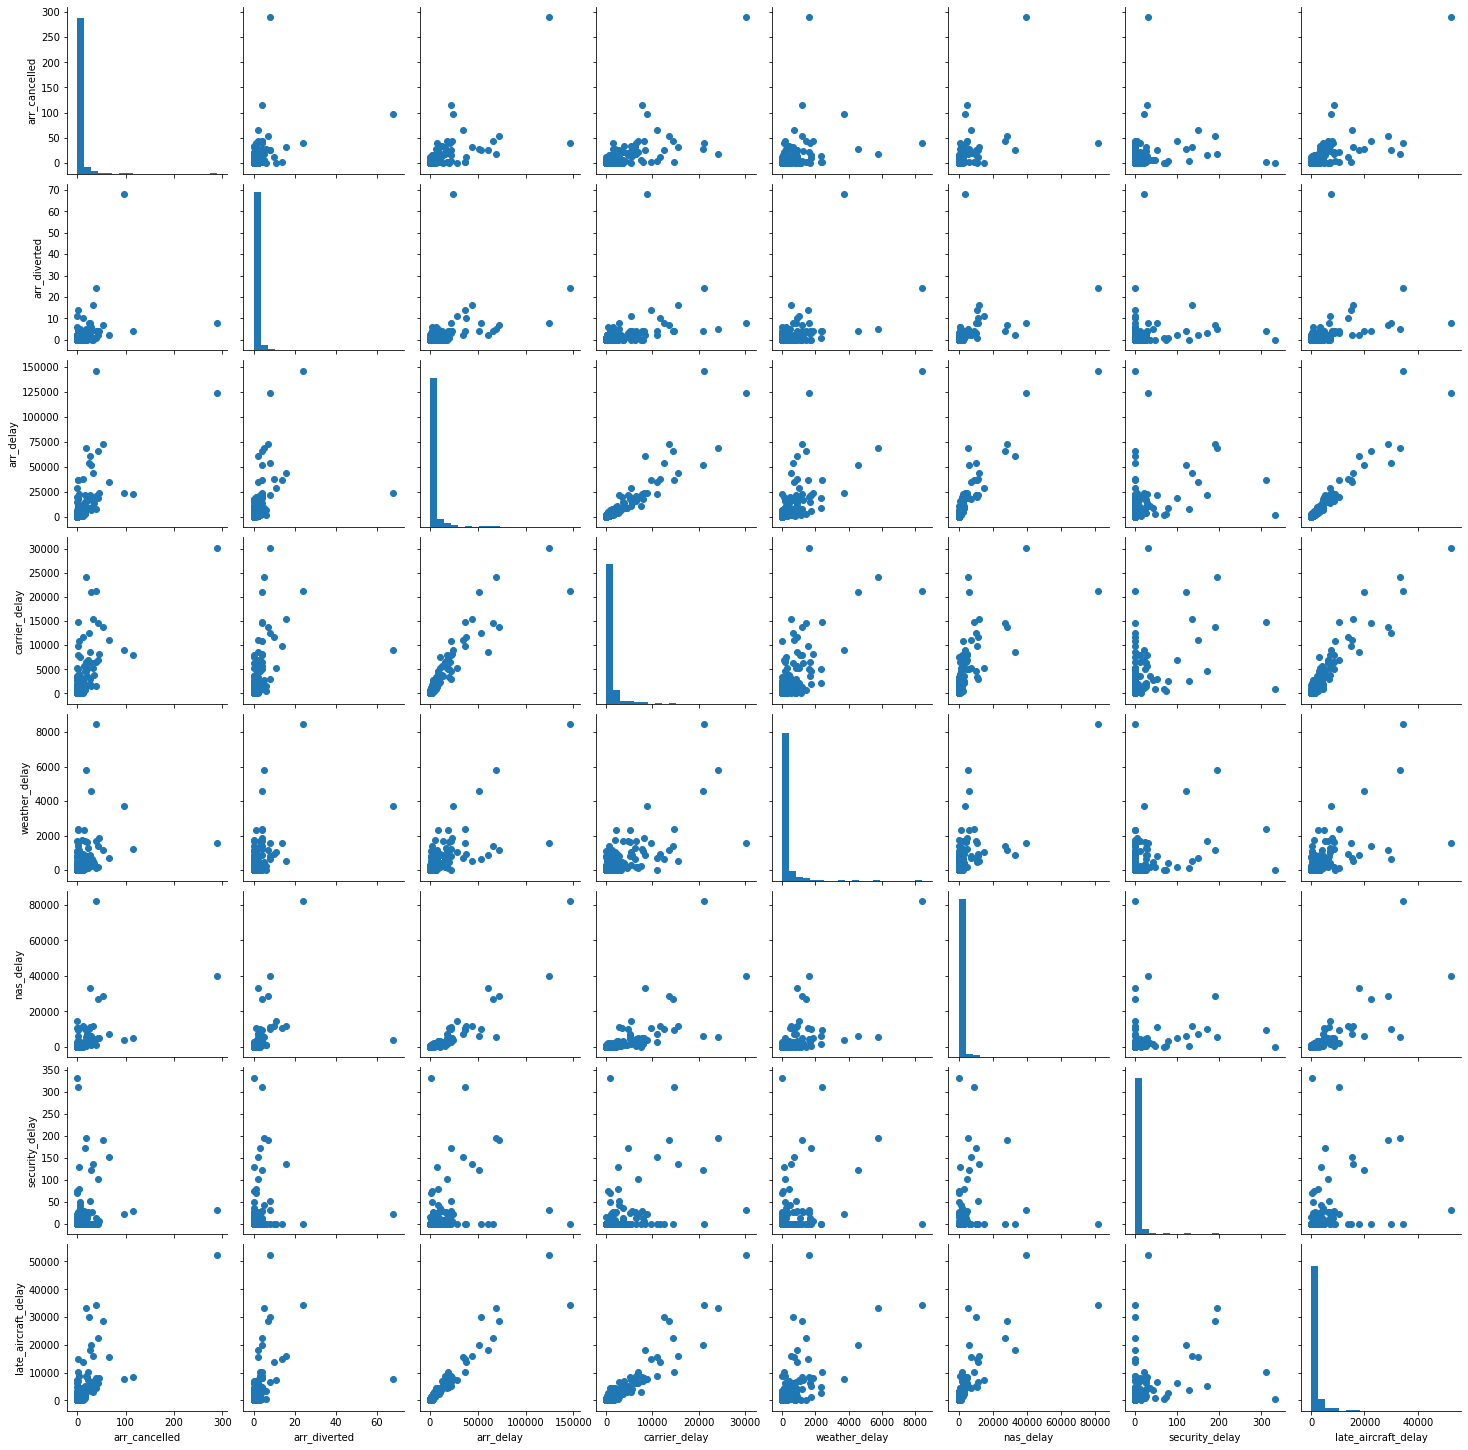

In [133]:
samples = np.random.choice(flight.shape[0], 500, replace = False)
flight_samp= flight.loc[samples,:]
plt.figure(figsize=(15,15))
g = sb.PairGrid(data = flight_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter)

From the above we see that arr_delay is strongly correlated with carrier delay and late aircraft delay

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

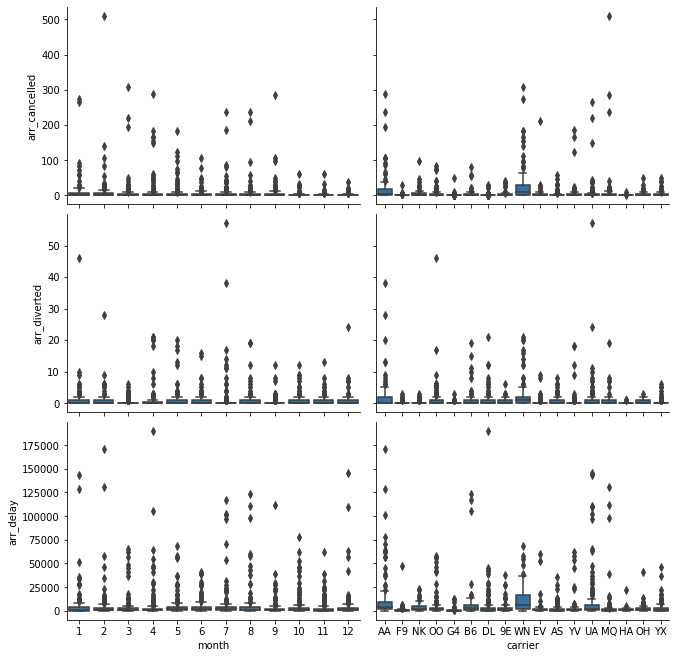

In [200]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(flight.shape[0], 2000, replace = False)
flight_samp = flight.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = flight_samp, y_vars = ['arr_cancelled', 'arr_diverted',
       'arr_delay'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

The plot above also confirms the distribution we earlier stated. Here we can see lots of outliers or extreme  values

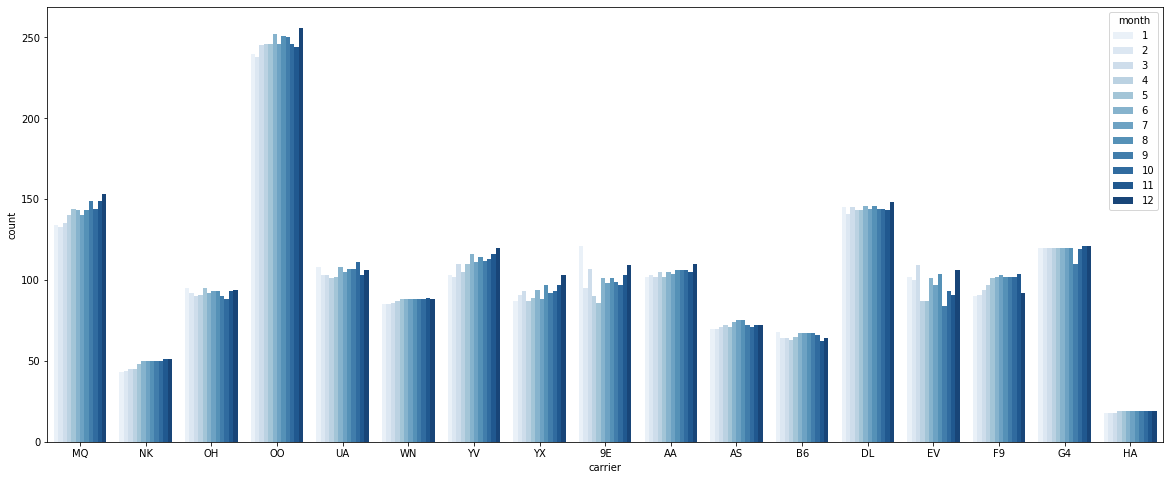

In [134]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [20, 8])

# subplot 1: color vs cut
#plt.subplot(3, 1, 1)
sb.countplot(data = flight, x = 'carrier', hue = 'month', palette = 'Blues')



In [136]:
# subplot 2: clarity vs. cut
"""ax = plt.subplot(3, 1, 2)
sb.countplot(data = diamonds, x = 'clarity', hue = 'cut', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = diamonds, x = 'clarity', hue = 'color', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()"""

"ax = plt.subplot(3, 1, 2)\nsb.countplot(data = diamonds, x = 'clarity', hue = 'cut', palette = 'Blues')\nax.legend(ncol = 2) # re-arrange legend to reduce overlapping\n\n# subplot 3: clarity vs. color, use different color palette\nax = plt.subplot(3, 1, 3)\nsb.countplot(data = diamonds, x = 'clarity', hue = 'color', palette = 'Greens')\nax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping\n\nplt.show()"

In [139]:
flight_jul_dec =flight.query("month>=7")
flight_jan_jun = flight.query("month<=6")

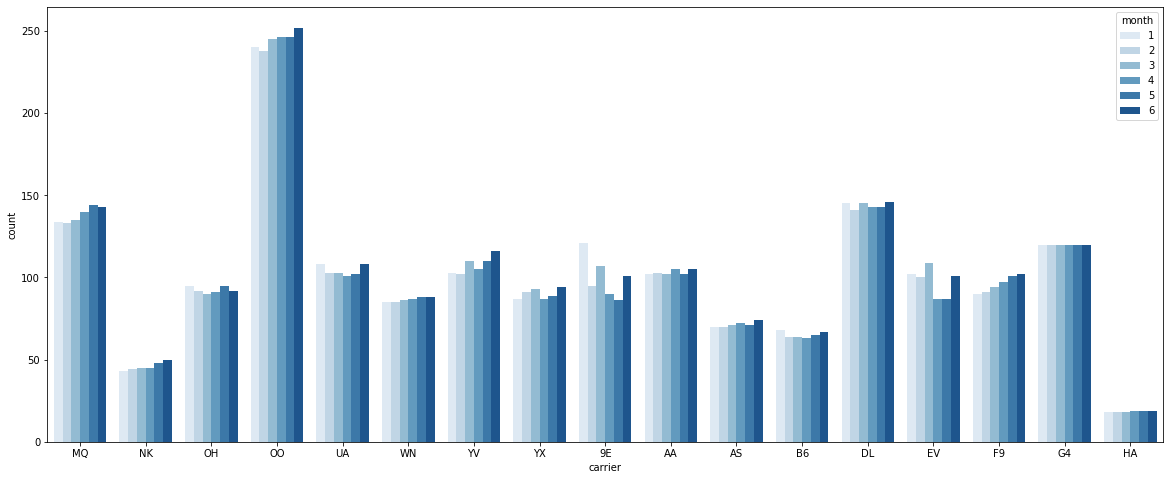

In [143]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [20, 8])

# subplot 1: color vs cut
#plt.subplot(3, 1, 1)
sb.countplot(data = flight_jan_jun, x = 'carrier', hue = 'month', palette = 'Blues')



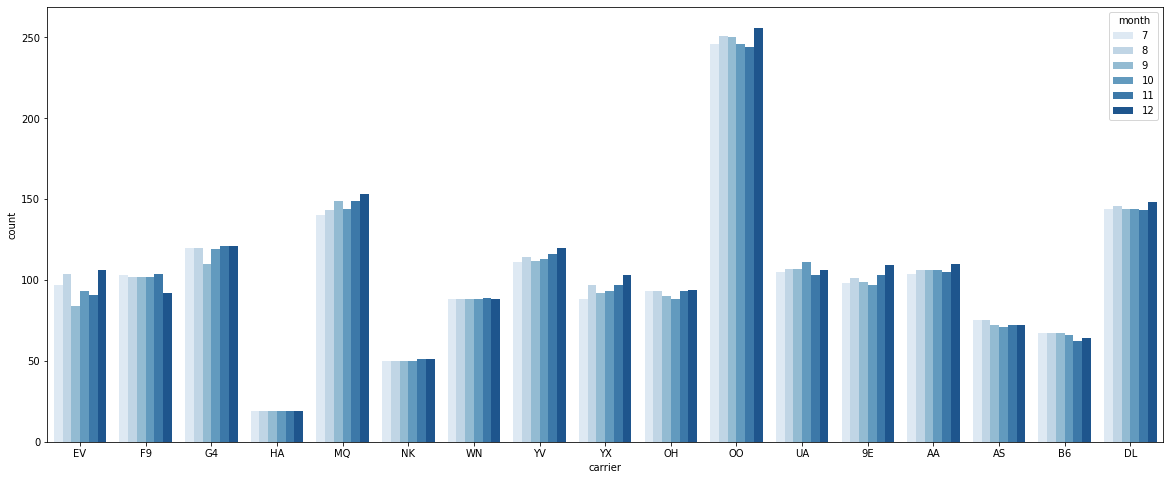

In [144]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [20, 8])

# subplot 1: color vs cut
#plt.subplot(3, 1, 1)
sb.countplot(data = flight_jul_dec, x = 'carrier', hue = 'month', palette = 'Blues')



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Arr_delay and arr_diverted had high correlations with arr_flights, arr_del15, carrier_ct and weather_ct. arr_delay was also highly correllated with late aircraft delay, nas_delay, weather_delay and carrier delay

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> late air craft delay is also highly correlated with a lot of features

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

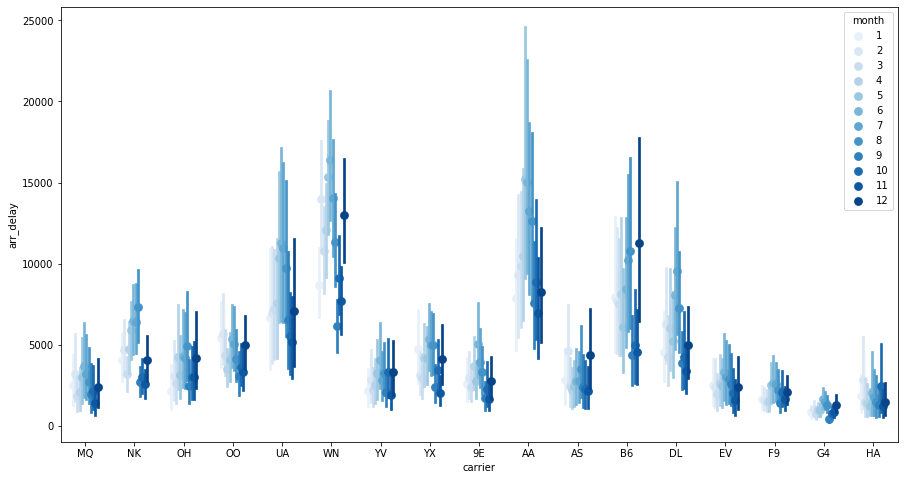

In [154]:
plt.figure(figsize=(15,8))
sb.pointplot(data = flight, x = 'carrier', y = 'arr_delay', hue = 'month',
             palette = 'Blues', linestyles = '', dodge = 0.5)#, ax = ax[0])

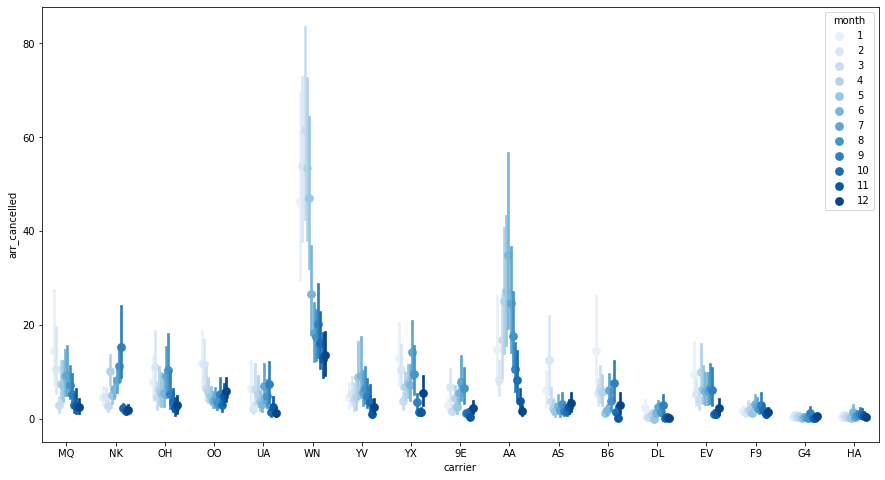

In [155]:
plt.figure(figsize=(15,8))
sb.pointplot(data = flight, x = 'carrier', y = 'arr_cancelled', hue = 'month',
             palette = 'Blues', linestyles = '', dodge = 0.5)#, ax = ax[0])

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From these plot we see that arrival delay and cancelled is higher in the first quarter of the year that is from January to April

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!